## Aim of this class is to get familiar with estimating ``activity'' of galaxies

Some questions to answer:
- how can we assess the ``activity'' of a galaxy?
- what information about a galaxy would we need?
- how confident can we be with our estimations?

do **NOT** copy the catalogues (they'll eat up your quota), use them directly via:

In [ ]:
# szuflada_path = '/home/SZUFLADA/PN/extragalactic_classes/gama_dr4/'
szuflada_path = '/media/olehryz/Elements/databases/GAMA_DR4/fits/'

lines_file = szuflada_path + 'GaussFitComplexv05.fits'

some imports:

In [9]:
import pandas as pd
pd.options.mode.copy_on_write = True

from astropy.io import fits
from astropy.table import Table

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
import numpy as np

In [12]:
import astropy.units as u

### TASK: explore the ``Baldwin, Phillips & Terlevich'' (BPT) diagram, based on GAMA galaxies

TODOs:
- create a BPT diagram for GAMA galaxies
- mark on the diagram different classes of galaxies
- mark division lines between the classes

some usefull pointers:
- Baldwin, Phillips & Terlevich 1981
- Kewley+2001
- Kauffmann+2003
- SpecLineSFR DMU from GAMA DR4
- some other papers about BPT diagram for GAMA galaxies ;)

In [13]:
with fits.open(lines_file) as hdul:
   data = hdul[1].data

data

FITS_rec([('1030206976962881536', 454340,  3.9914443, 0.06175309, -4.4398337e-05, 7.61742558e-05, 1.2781872, 1.2616848, 0., 3,   0, 0, 0, -5.9470057, -12.633695 , -6.5769744 , 6924.39260834,   0.       , -0.       , -135.82507 , -0.        , 1.2306969, -0.        ,   0.      ,  -0.      ,   0.        , -0.        , -6.3441426e-01,  2.5299299e-01,   -131.63239 , -0.0000000e+00,  1.8171741e+01, -0.0000000e+00, -2.8897442e+01,  1.1523780e+01, -5.1771584e+00,  2.0661471e+00, 2, -9.9999000e+04, -9.999900e+04, -99999.   , -9.9999000e+04, -99999.     , -99999., -99999.    , -99999.    , -9.9999000e+04, -9.9999000e+04, 0,  -0.17907165,  0.40531808,  2.1859448 , 0.1414992 , 7.2701273 , 4.6304045 ,  -3.2633135,   7.673171 ,  -0.58551335,  1.3767728 ,   0.8590738,  0.4576994, 69.12808 , 4.474756  , 7.3066425 ,  4.6536613,   15.733969,  13.064967,  2.8251390e+00,  2.3463128 , 0, 0, -1.3204446e+00,  3.5701420e+00, -6.4149187e-03,  2.8555398e-03,  1.0935454e+00,  1.1975232e+00, 0., 2,   0,  1, 100, 

In [14]:
table = Table(data)

lines = table.to_pandas()

lines.head()

,SPECID,CATAID,HB_CONT,HB_CONT_ERR,HB_GRAD,HB_GRAD_ERR,HB_REDCHI_EMB,HB_REDCHI_EMABS,HB_FITFAIL,HB_NPEG,...,POS_NIIR,POS_NIIR_ERR,SIG_NIIR,SIG_NIIR_ERR,NIIR_FLUX,NIIR_FLUX_ERR,NIIR_EW,NIIR_EW_ERR,NIIB_NPEG,NIIR_NPEG
0,1030206976962881536,454340,3.991444,0.061753,-0.000044,0.000076,1.278187,1.261685,0.0,3,...,33.198139,1.994904,6.911168,2.888402,93.045250,48.324772,-43.454430,103.694489,0,0
1,1030207251840788480,478246,27.101358,0.134811,0.000009,0.000033,1.136868,1.106717,0.0,0,...,22.995220,0.434402,2.618714,0.419719,69.508110,15.079922,1.997449,0.434323,0,0
2,1030207801596602368,478249,39.710850,0.244997,-0.000081,0.000041,1.232322,1.176592,0.0,1,...,23.285004,1.278312,3.840015,1.322465,49.923748,23.125069,0.832827,0.385787,0,0
3,1030208626230323200,454298,30.505415,0.220010,-0.000257,0.000046,1.352126,1.281670,0.0,0,...,24.007812,0.160095,3.050972,0.165903,245.131943,18.146864,6.362538,0.472219,0,0
4,1030217972079159296,457151,45.830002,0.229451,-0.000068,0.000035,1.174065,1.065116,0.0,0,...,22.759569,0.105857,1.569237,0.108898,165.324478,15.793898,4.141389,0.396054,0,0


### Classic BPT diagram requirements:
- S/N of ALL LINES (OIII5007, NII6563, HA, HB) > 3
- Theoretical lines are taken from the papers of Kauffmann and Kewley (or from Ryzhov+2025)

In [15]:
lines_bpt = lines[
    (lines['NIIR_FLUX'] > 0) & (lines['NIIR_FLUX'] > 3*lines['NIIR_FLUX_ERR']) &
    (lines['HA_FLUX'] > 0) & (lines['HA_FLUX'] > 3*lines['HA_FLUX_ERR']) &
    (lines['OIIIR_FLUX'] > 0) & (lines['OIIIR_FLUX'] > 3*lines['OIIIR_FLUX_ERR']) &
    (lines['HB_FLUX'] > 0) & (lines['HB_FLUX'] > 3*lines['HB_FLUX_ERR'])
]

lines_bpt.shape

(51782, 140)

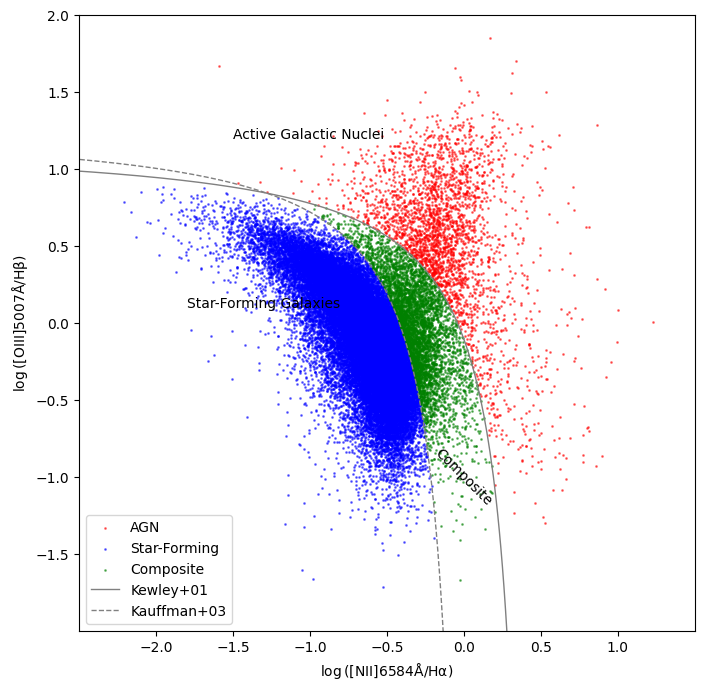

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))

agns = lines_bpt[
    (np.log10(lines_bpt['OIIIR_FLUX']/lines_bpt['HB_FLUX']) >
     (0.61/(np.log10(lines_bpt['NIIR_FLUX']/lines_bpt['HA_FLUX']) - 0.47)) + 1.19) | 
     (np.log10(lines_bpt['NIIR_FLUX']/lines_bpt['HA_FLUX']) > 0.47)
]

sfrs = lines_bpt[
    (np.log10(lines_bpt['OIIIR_FLUX']/lines_bpt['HB_FLUX']) < 
     (0.61/(np.log10(lines_bpt['NIIR_FLUX']/lines_bpt['HA_FLUX']) - 0.05)) + 1.3) &
     (np.log10(lines_bpt['NIIR_FLUX']/lines_bpt['HA_FLUX']) < 0.05)
]

uncls = lines_bpt.drop(agns.index).drop(sfrs.index)

ax.scatter(np.log10(agns['NIIR_FLUX']/agns['HA_FLUX']),
           np.log10(agns['OIIIR_FLUX']/agns['HB_FLUX']),
           s=1, alpha=0.5, color='red', label='AGN')

ax.scatter(np.log10(sfrs['NIIR_FLUX']/sfrs['HA_FLUX']),
           np.log10(sfrs['OIIIR_FLUX']/sfrs['HB_FLUX']),
           s=1, alpha=0.5, color='blue', label='Star-Forming')

ax.scatter(np.log10(uncls['NIIR_FLUX']/uncls['HA_FLUX']),
           np.log10(uncls['OIIIR_FLUX']/uncls['HB_FLUX']),
           s=1, alpha=0.5, color='green', label='Composite')

ax.set_xlabel(r'$\log \mathrm{([NII]6584\AA/H\alpha)}$')
ax.set_ylabel(r'$\log{\mathrm{([OIII]5007\AA/H\beta)}}$')
ax.set_yticks(np.arange(-1.5, 2.1, 0.5))
ax.set_xticks(np.arange(-2, 1.2, 0.5))
ax.set_xlim(-2.5, 1.5)
ax.set_ylim(-2.0, 2.0)
X_1 = np.arange(-4, 0.4, 0.01)
X_111 = np.arange(-4, 0, 0.01)
X_11 = np.arange(-0.2, 1.5, 0.01)
ax.plot(X_1, (0.61/(X_1 - 0.47)) + 1.19,
                      c='grey', linewidth=1, label='Kewley+01')  # Kewley, 2001
ax.plot(X_111, (0.61/(X_111 - 0.05)) + 1.3,
                      c='grey', linestyle='dashed', linewidth=1, label='Kauffman+03')  # Kauffman, 2003
# ax.plot(X_11, 1.01*X_11 + 0.48, c='grey', linestyle='dotted', linewidth=1, label='Stasinska+06')
ax.text(-1.5, 1.2, 'Active Galactic Nuclei')
ax.text(0, -1, 'Composite', ha='center', va='center', rotation = -45, 
         rotation_mode = 'anchor', 
         transform_rotates_text = True)
ax.text(-1.8, 0.1, 'Star-Forming Galaxies')
# ax.text(1.0, -0.5, 'Low-Ionization (Nuclear) Emission', rotation = 90, 
#          rotation_mode = 'anchor', 
#          transform_rotates_text = True)
ax.set_box_aspect(1)
ax.legend()